In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("../data-train/car data.csv")

In [68]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


## the price is in indian rupee
we will change it to us dollar

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [70]:
df.shape

(301, 9)

In [72]:
df["Year"].unique()

array([2014, 2013, 2017, 2011, 2018, 2015, 2016, 2009, 2010, 2012, 2003,
       2008, 2006, 2005, 2004, 2007])

In [73]:
df["Fuel_Type"].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [75]:
df["Seller_Type"].unique()

array(['Dealer', 'Individual'], dtype=object)

In [76]:
df["Transmission"].unique()

array(['Manual', 'Automatic'], dtype=object)

In [78]:
df["Owner"].unique()

array([0, 1, 3])

In [80]:
df[df.duplicated()].sort_values("Car_Name")

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
17,ertiga,2016,7.75,10.79,43000,Diesel,Dealer,Manual,0
93,fortuner,2015,23.00,30.61,40000,Diesel,Dealer,Automatic,0


In [81]:
df.drop_duplicates(inplace=True)

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 299 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       299 non-null    object 
 1   Year           299 non-null    int64  
 2   Selling_Price  299 non-null    float64
 3   Present_Price  299 non-null    float64
 4   Kms_Driven     299 non-null    int64  
 5   Fuel_Type      299 non-null    object 
 6   Seller_Type    299 non-null    object 
 7   Transmission   299 non-null    object 
 8   Owner          299 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 23.4+ KB


In [83]:
df.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


In [84]:
cat_features = list(df.select_dtypes(include="object").columns)
cat_features

['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission']

In [85]:
num_features = list(df.select_dtypes(include= np.number))
num_features

['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner']

In [86]:
df[num_features].describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,299.000000,299.000000,299.000000,299.000000,299.000000
mean,2013.615385,4.589632,7.541037,36916.752508,0.043478
std,2.896868,4.984240,8.567887,39015.170352,0.248720
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.850000,1.200000,15000.000000,0.000000
50%,2014.000000,3.510000,6.100000,32000.000000,0.000000
75%,2016.000000,6.000000,9.840000,48883.500000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [87]:
df.to_csv('Cleaned Car.csv')

# EDA

<Axes: ylabel='Selling_Price'>

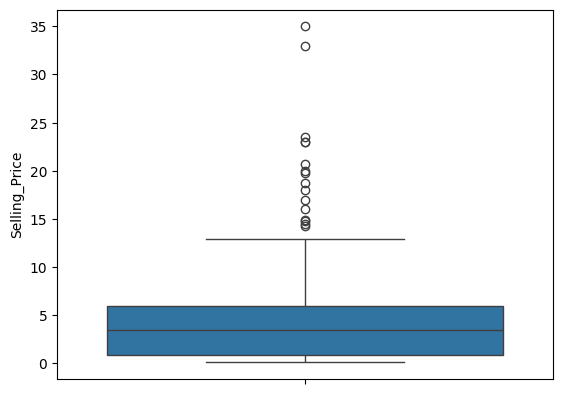

In [88]:
sns.boxplot(df["Selling_Price"])

<Axes: ylabel='Kms_Driven'>

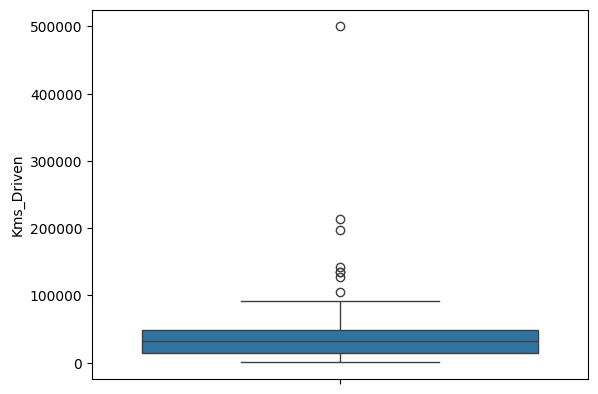

In [90]:
sns.boxplot(df["Kms_Driven"])

Text(0.5, 1.0, 'Year')

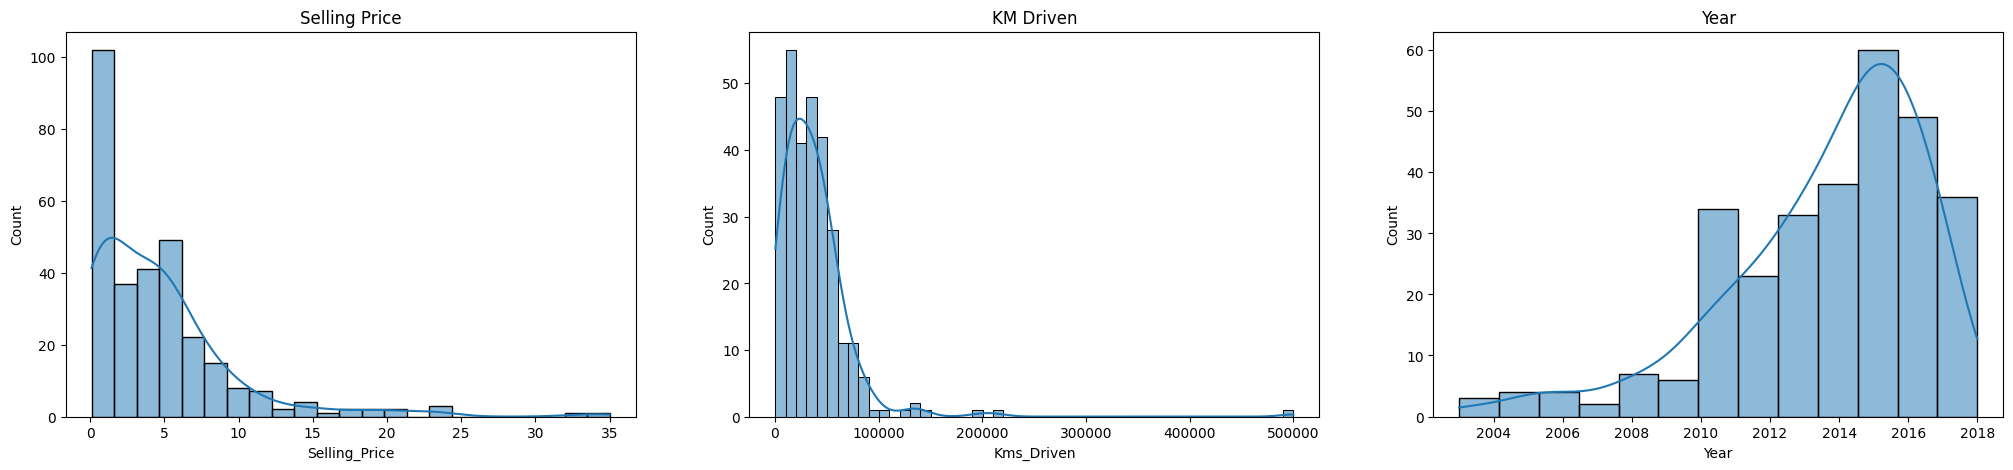

In [94]:
fig, axes = plt.subplots(1, 3, figsize=(25, 5))

# Plotting histograms for each feature
sns.histplot(df['Selling_Price'], kde=True, ax=axes[0])
axes[0].set_title('Selling Price')

sns.histplot(df['Kms_Driven'].astype(float), kde=True, ax=axes[1])
axes[1].set_title('KM Driven')

sns.histplot(df['Year'], kde=True, ax=axes[2])
axes[2].set_title('Year')


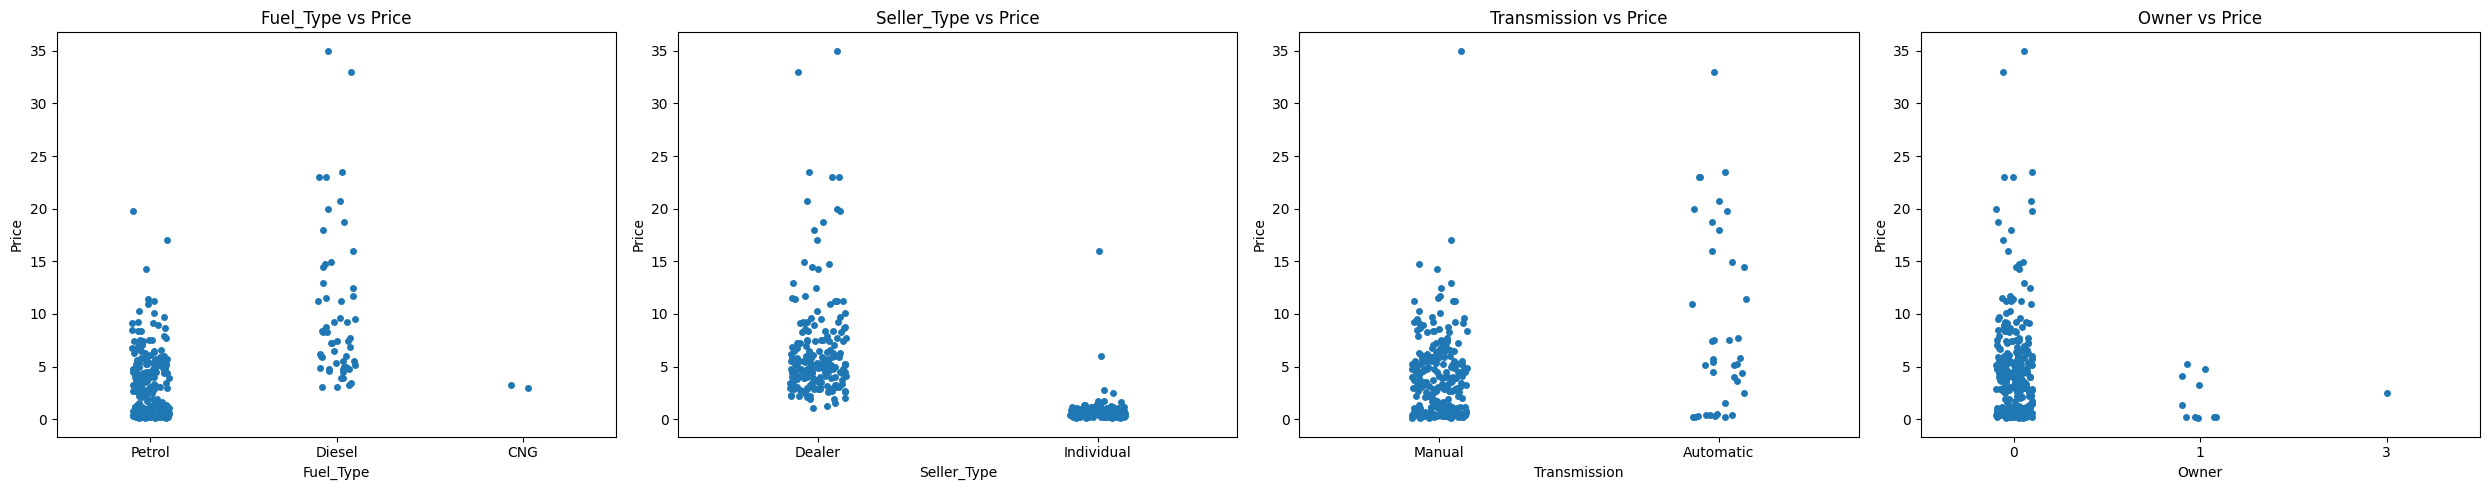

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt


# Daftar kategori
categories = [ 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']

fig, axes = plt.subplots(1, 4, figsize=(25, 5))


for i, category in enumerate(categories):
    sns.stripplot(data=df, x=category, y='Selling_Price', ax=axes[i], jitter=True)
    axes[i].set_title(f'{category} vs Price')
    axes[i].set_xlabel(category)
    axes[i].set_ylabel('Price')

# Tampilkan plot
plt.tight_layout()
plt.show()


# Model

In [97]:
X = df.drop(columns="Selling_Price")
y = df["Selling_Price"]

In [98]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [99]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline


In [100]:
ohe = OneHotEncoder()
ohe.fit(X[["Car_Name", "Fuel_Type", "Seller_Type", "Transmission", "Owner"]])
ohe.categories_

[array(['800', 'Activa 3g', 'Activa 4g', 'Bajaj  ct 100',
        'Bajaj Avenger 150', 'Bajaj Avenger 150 street',
        'Bajaj Avenger 220', 'Bajaj Avenger 220 dtsi',
        'Bajaj Avenger Street 220', 'Bajaj Discover 100',
        'Bajaj Discover 125', 'Bajaj Dominar 400', 'Bajaj Pulsar  NS 200',
        'Bajaj Pulsar 135 LS', 'Bajaj Pulsar 150', 'Bajaj Pulsar 220 F',
        'Bajaj Pulsar NS 200', 'Bajaj Pulsar RS200', 'Hero  CBZ Xtreme',
        'Hero  Ignitor Disc', 'Hero Extreme', 'Hero Glamour',
        'Hero Honda CBZ extreme', 'Hero Honda Passion Pro', 'Hero Hunk',
        'Hero Passion Pro', 'Hero Passion X pro', 'Hero Splender Plus',
        'Hero Splender iSmart', 'Hero Super Splendor', 'Honda Activa 125',
        'Honda Activa 4G', 'Honda CB Hornet 160R', 'Honda CB Shine',
        'Honda CB Trigger', 'Honda CB Unicorn', 'Honda CB twister',
        'Honda CBR 150', 'Honda Dream Yuga ', 'Honda Karizma',
        'Hyosung GT250R', 'KTM 390 Duke ', 'KTM RC200', 'KTM RC390',


In [102]:

column_trans = make_column_transformer(
    (OneHotEncoder(categories=ohe.categories_), ["Car_Name","Fuel_Type", "Seller_Type", "Transmission", "Owner"]),
    remainder="passthrough"
)

# Transformasi data
transformed_data = column_trans.fit_transform(df)

# Konversi kembali ke DataFrame agar mudah dibaca
transformed_df = pd.DataFrame(transformed_data)
print(transformed_df)


                                                     0
0      (0, 90)\t1.0\n  (0, 100)\t1.0\n  (0, 101)\t1...
1      (0, 93)\t1.0\n  (0, 99)\t1.0\n  (0, 101)\t1....
2      (0, 68)\t1.0\n  (0, 100)\t1.0\n  (0, 101)\t1...
3      (0, 96)\t1.0\n  (0, 100)\t1.0\n  (0, 101)\t1...
4      (0, 92)\t1.0\n  (0, 99)\t1.0\n  (0, 101)\t1....
..                                                 ...
294    (0, 69)\t1.0\n  (0, 99)\t1.0\n  (0, 101)\t1....
295    (0, 66)\t1.0\n  (0, 100)\t1.0\n  (0, 101)\t1...
296    (0, 69)\t1.0\n  (0, 100)\t1.0\n  (0, 101)\t1...
297    (0, 69)\t1.0\n  (0, 99)\t1.0\n  (0, 101)\t1....
298    (0, 66)\t1.0\n  (0, 100)\t1.0\n  (0, 101)\t1...

[299 rows x 1 columns]


In [103]:
from sklearn.ensemble import RandomForestRegressor

lr = LinearRegression()
rf = RandomForestRegressor(random_state = 42)
piperf = make_pipeline(column_trans, rf)
pipelr = make_pipeline(column_trans, lr)

In [104]:

pipelr.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['800', 'Activa 3g', 'Activa 4g', 'Bajaj  ct 100',
       'Bajaj Avenger 150', 'Bajaj Avenger 150 street',
       'Bajaj Avenger 220', 'Bajaj Avenger 220 dtsi',
       'Bajaj Avenger Street 220', 'Bajaj Discover 100',
       'Bajaj Discover 125', 'Bajaj Dominar 400', 'Baj...
       'land cruiser', 'omni', 'ritz', 's cross', 'swift', 'sx4', 'verna',
       'vitara brezza', 'wagon r', 'xcent'], dtype=object),
                                                                            array(['CNG', 'Diesel', 'Petrol'], dtype=object),
                                                                            array(['Dealer', 'Individual'], dtype=object),
                                                                            array(['Automatic', 'Manual'], dtype=object),
                                                                            array([0, 1, 3])]),
                                                  ['Car_Name', 'Fuel_Type',
                                                   'Seller_Type',
                                                   'Transmission',
                                                   'Owner'])])),
                ('linearregression', LinearRegression())])

In [106]:
y_pred = pipelr.predict(X_test)
print(r2_score(y_test, y_pred))

0.8633561960063867


<function matplotlib.pyplot.show(close=None, block=None)>

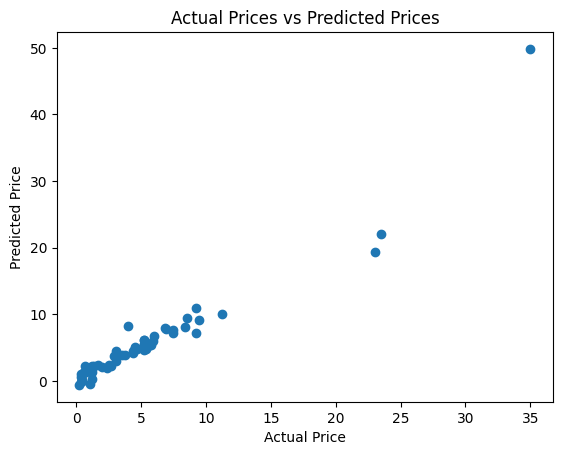

In [107]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show

In [108]:
import pickle

In [110]:
pickle.dump(pipelr, open('LinearRegressionModel.pkl','wb') )